In [1]:
import os
import pandas as pd
import numpy as np
import scipy
import statsmodels
import sklearn
import datetime
import calendar
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pandasql import sqldf
%matplotlib inline
import math
import collections
from operator import itemgetter
from collections import OrderedDict
from matplotlib.pyplot import show
from pandas import DataFrame
import seaborn as sns

/Users/chanduboss/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
os.chdir("/Users/chanduboss/Desktop/SUITEAMERICA")
os.getcwd()

'/Users/chanduboss/Desktop/SUITEAMERICA'

In [3]:
df = pd.read_csv("OrdersData_Timeseries.csv")
df.head()

,Order#,MoveInDate,MoveOutDate,DailyRent,SuiteSizeCode,Status,ZoneCode,City,State,GuestFirstName,Master#,ComplexName,BookedDate,StatusChanged,Unnamed: 14
0,285536,14/09/15,28/10/15,254.0,1X1,TERMED,8.0,SAN FRANCISCO,US-CA,Matthew Richard,283368,AVALON HAYES VALLEY,14/08/15,NaN,NaN
1,289693,16/10/15,14/11/15,250.0,1X1,TERMED,8.0,SAN FRANCISCO,US-CA,Orion Richardson,119226,AVALON MISSION BAY PHASE I,29/09/15,NaN,NaN
2,354867,25/02/18,26/03/18,NaN,NaN,CANCEL,NaN,NaN,NaN,RQ5C71AF,NaN,NaN,31/01/18,NaN,NaN
3,355682,19/02/18,02/03/18,197.0,1X1,TERMED,7.0,SAN MATEO,US-CA,Thomas Spanswick,335345,PARK PLACE AT SAN MATEO,09/02/18,NaN,NaN
4,322147,17/12/16,28/02/17,148.0,1X1,TERMED,46.0,HILLSBORO,US-OR,Michael Ulrich,301739,206 APARTMENTS,17/11/16,NaN,NaN


In [110]:
df.shape

(46850, 15)

In [111]:
df.describe(include='all')

,Order#,MoveInDate,MoveOutDate,DailyRent,SuiteSizeCode,Status,ZoneCode,City,State,GuestFirstName,Master#,ComplexName,BookedDate,StatusChanged,Unnamed: 14
count,46850.000000,46777,43974,41806.000000,35213,46850,34560.000000,35180,35180,45186,35213,35207,46804,1306,0.0
unique,NaN,1546,1524,NaN,38,6,NaN,409,46,34874,6324,1660,1304,38,NaN
top,NaN,2018-04-01,2018-06-30,NaN,1X1,TERMED,NaN,CUPERTINO,US-CA,TBD,259056,APPLE,2018-02-20,2018-05-04,NaN
freq,NaN,296,194,NaN,21828,29349,NaN,6376,24298,717,2657,2709,159,68,NaN
mean,323875.540406,NaN,NaN,286.298409,NaN,NaN,14.090943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,31611.280139,NaN,NaN,421.372716,NaN,NaN,15.692640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,5012.000000,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,298285.250000,NaN,NaN,150.000000,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,334230.500000,NaN,NaN,192.000000,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,350816.750000,NaN,NaN,236.000000,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
df.dtypes

Order#              int64
MoveInDate         object
MoveOutDate        object
DailyRent         float64
SuiteSizeCode      object
Status             object
ZoneCode          float64
City               object
State              object
GuestFirstName     object
Master#            object
ComplexName        object
BookedDate         object
StatusChanged      object
Unnamed: 14       float64
dtype: object

In [113]:
df['MoveInDate'] = pd.to_datetime(df['MoveInDate'],format='%Y-%m-%d %H:%M')
df["MoveOutDate"] = pd.to_datetime(df['MoveOutDate'],format='%Y-%m-%d %H:%M')
df['MoveInDate_week'] = df['MoveInDate'].dt.weekday_name
df["MoveOutDay_Week"] = df["MoveOutDate"].dt.weekday_name
df['Move_In_Month']= df.MoveInDate.dt.month
df["Move_Out_Month"] = df.MoveOutDate.dt.month
df['Move_In_year']=df.MoveInDate.dt.year
df['Move_Out_Year'] = df.MoveOutDate.dt.year

In [114]:
#df["stay"] = (df["MoveOutDate"] - df["MoveInDate"]).dt.days

In [115]:
del df['Unnamed: 14']
del df['ComplexName']
del df['GuestFirstName']

In [116]:
df.dtypes.count

<bound method Series.count of Order#                      int64
MoveInDate         datetime64[ns]
MoveOutDate        datetime64[ns]
DailyRent                 float64
SuiteSizeCode              object
Status                     object
ZoneCode                  float64
City                       object
State                      object
Master#                    object
BookedDate                 object
StatusChanged              object
MoveInDate_week            object
MoveOutDay_Week            object
Move_In_Month             float64
Move_Out_Month            float64
Move_In_year              float64
Move_Out_Year             float64
dtype: object>

In [117]:
df.shape

(46850, 18)

In [118]:
df.head(15)

,Order#,MoveInDate,MoveOutDate,DailyRent,SuiteSizeCode,Status,ZoneCode,City,State,Master#,BookedDate,StatusChanged,MoveInDate_week,MoveOutDay_Week,Move_In_Month,Move_Out_Month,Move_In_year,Move_Out_Year
0,285536,2015-09-14,2015-10-28,254.0,1X1,TERMED,8.0,SAN FRANCISCO,US-CA,283368,2015-08-14,NaN,Monday,Wednesday,9.0,10.0,2015.0,2015.0
1,289693,2015-10-16,2015-11-14,250.0,1X1,TERMED,8.0,SAN FRANCISCO,US-CA,119226,2015-09-29,NaN,Friday,Saturday,10.0,11.0,2015.0,2015.0
2,354867,2018-02-25,2018-03-26,NaN,NaN,CANCEL,NaN,NaN,NaN,NaN,2018-01-31,NaN,Sunday,Monday,2.0,3.0,2018.0,2018.0
3,355682,2018-02-19,2018-03-02,197.0,1X1,TERMED,7.0,SAN MATEO,US-CA,335345,2018-02-09,NaN,Monday,Friday,2.0,3.0,2018.0,2018.0
4,322147,2016-12-17,2017-02-28,148.0,1X1,TERMED,46.0,HILLSBORO,US-OR,301739,2016-11-17,NaN,Saturday,Tuesday,12.0,2.0,2016.0,2017.0
5,305710,2016-05-29,2016-06-27,219.0,1X1,TERMED,5.0,CUPERTINO,US-CA,238110,2016-04-26,NaN,Sunday,Monday,5.0,6.0,2016.0,2016.0
6,348736,2017-11-26,NaT,NaN,NaN,CANCEL,NaN,NaN,NaN,NaN,2017-11-07,NaN,Sunday,NaN,11.0,NaN,2017.0,NaN
7,362371,2018-05-01,2018-05-21,202.0,1X1,ACTIVE,5.0,SUNNYVALE,US-CA,278650,2018-04-30,2018-04-30,Tuesday,Monday,5.0,5.0,2018.0,2018.0
8,361210,2018-05-09,2018-06-07,0.0,NaN,CANCEL,NaN,NaN,NaN,NaN,2018-04-13,NaN,Wednesday,Thursday,5.0,6.0,2018.0,2018.0
9,326135,2017-03-21,2017-04-15,236.0,2X2,TERMED,42.0,WASHINGTON,US-DC,326751,2017-02-02,NaN,Tuesday,Saturday,3.0,4.0,2017.0,2017.0


In [119]:
df['sum']=df.isnull().sum(axis=1)


In [120]:
df.describe()

,Order#,DailyRent,ZoneCode,Move_In_Month,Move_Out_Month,Move_In_year,Move_Out_Year,sum
count,46850.000000,41806.000000,34560.000000,46777.000000,43974.000000,46777.000000,43974.000000,46850.000000
mean,323875.540406,286.298409,14.090943,6.030977,6.423273,2016.597409,2016.746691,2.589840
std,31611.280139,421.372716,15.692640,3.374918,3.286883,1.281791,3.146523,2.725725
min,5012.000000,0.000000,1.000000,1.000000,1.000000,1994.000000,2015.000000,0.000000
25%,298285.250000,150.000000,5.000000,3.000000,4.000000,2016.000000,2016.000000,1.000000
50%,334230.500000,192.000000,7.000000,6.000000,6.000000,2017.000000,2017.000000,1.000000
75%,350816.750000,236.000000,13.000000,9.000000,9.000000,2018.000000,2018.000000,6.000000
max,363867.000000,3000.000000,77.000000,12.000000,12.000000,2106.000000,2099.000000,16.000000


In [121]:
df.isnull().sum()

Order#                 0
MoveInDate            73
MoveOutDate         2876
DailyRent           5044
SuiteSizeCode      11637
Status                 0
ZoneCode           12290
City               11670
State              11670
Master#            11637
BookedDate            46
StatusChanged      45544
MoveInDate_week       73
MoveOutDay_Week     2876
Move_In_Month         73
Move_Out_Month      2876
Move_In_year          73
Move_Out_Year       2876
sum                    0
dtype: int64

In [122]:
d = ["CANCEL","QUOTE","VOID"]
new_data = df[~df["Status"].isin(d)]

In [123]:
new_data.shape

(31171, 19)

In [124]:
new_data.head()

,Order#,MoveInDate,MoveOutDate,DailyRent,SuiteSizeCode,Status,ZoneCode,City,State,Master#,BookedDate,StatusChanged,MoveInDate_week,MoveOutDay_Week,Move_In_Month,Move_Out_Month,Move_In_year,Move_Out_Year,sum
0,285536,2015-09-14,2015-10-28,254.0,1X1,TERMED,8.0,SAN FRANCISCO,US-CA,283368,2015-08-14,NaN,Monday,Wednesday,9.0,10.0,2015.0,2015.0,1
1,289693,2015-10-16,2015-11-14,250.0,1X1,TERMED,8.0,SAN FRANCISCO,US-CA,119226,2015-09-29,NaN,Friday,Saturday,10.0,11.0,2015.0,2015.0,1
3,355682,2018-02-19,2018-03-02,197.0,1X1,TERMED,7.0,SAN MATEO,US-CA,335345,2018-02-09,NaN,Monday,Friday,2.0,3.0,2018.0,2018.0,1
4,322147,2016-12-17,2017-02-28,148.0,1X1,TERMED,46.0,HILLSBORO,US-OR,301739,2016-11-17,NaN,Saturday,Tuesday,12.0,2.0,2016.0,2017.0,1
5,305710,2016-05-29,2016-06-27,219.0,1X1,TERMED,5.0,CUPERTINO,US-CA,238110,2016-04-26,NaN,Sunday,Monday,5.0,6.0,2016.0,2016.0,1


In [125]:

df_MI = pd.DataFrame(data= new_data.MoveInDate, index=None)
df_MI = df_MI.rename(columns={'MoveInDate': 'Date'})


In [126]:
df_MI['Date'] = pd.to_datetime(df_MI['Date'],format= '%d-%m-%Y')

In [127]:
df_MI['Date'] = pd.to_datetime(df_MI['Date'])


In [128]:
df_MI.shape

(31171, 1)

In [129]:
df_MI.head()

,Date
0,2015-09-14
1,2015-10-16
3,2018-02-19
4,2016-12-17
5,2016-05-29


In [130]:
df_MI['year']= df_MI['Date'].dt.year
df_MI
df_MI['Month']= df_MI['Date'].dt.month
df_MI['Weak']= df_MI['Date'].dt.weekday_name
df_MI['Count']= 1

In [131]:
df_MI.head(20)

,Date,year,Month,Weak,Count
0,2015-09-14,2015,9,Monday,1
1,2015-10-16,2015,10,Friday,1
3,2018-02-19,2018,2,Monday,1
4,2016-12-17,2016,12,Saturday,1
5,2016-05-29,2016,5,Sunday,1
7,2018-05-01,2018,5,Tuesday,1
9,2017-03-21,2017,3,Tuesday,1
10,2017-11-30,2017,11,Thursday,1
12,2015-05-06,2015,5,Wednesday,1
13,2016-07-22,2016,7,Friday,1


In [132]:
df_MI = df_MI[df_MI["year"] > 2013]
df_MI = df_MI[df_MI["year"] < 2019]


In [133]:
df_MI.head()

,Date,year,Month,Weak,Count
0,2015-09-14,2015,9,Monday,1
1,2015-10-16,2015,10,Friday,1
3,2018-02-19,2018,2,Monday,1
4,2016-12-17,2016,12,Saturday,1
5,2016-05-29,2016,5,Sunday,1


In [134]:
min(df_MI['Date'])

Timestamp('2014-01-09 00:00:00')

In [135]:
max(df_MI.Date)

Timestamp('2018-11-01 00:00:00')

In [136]:
df_MI.dtypes

Date     datetime64[ns]
year              int64
Month             int64
Weak             object
Count             int64
dtype: object

In [137]:
df_MI.Date= pd.to_datetime(df_MI.Date, format="%Y%m%d").sort_values()

In [138]:
sortdate= pd.DataFrame(df_MI.Date.sort_values())

In [139]:
sortdate["COUNT"] =1
sortdate.head()

,Date,COUNT
12870,2014-01-09,1
27005,2014-01-11,1
40660,2014-01-23,1
22077,2014-02-03,1
35148,2014-02-12,1


In [140]:
df_MI.to_csv('sortfile.csv')

In [267]:


df_final = pd.read_csv("sortfile.csv", st)
df_final.head()
df_final.tail()
df_final= df_final.sort_values(by='Date')

df_final['Count']= df_final.groupby('Date')['Date'].transform('count')

In [268]:
del df_final['Unnamed: 0']

In [269]:
print(df_final)

             Date  year  Month       Weak  Count
8552   2014-01-09  2014      1   Thursday      1
17976  2014-01-11  2014      1   Saturday      1
26982  2014-01-23  2014      1   Thursday      1
14717  2014-02-03  2014      2     Monday      1
23395  2014-02-12  2014      2  Wednesday      1
25248  2014-02-13  2014      2   Thursday      2
27643  2014-02-13  2014      2   Thursday      2
18165  2014-02-18  2014      2    Tuesday      1
24896  2014-02-22  2014      2   Saturday      1
11063  2014-03-03  2014      3     Monday      2
16940  2014-03-03  2014      3     Monday      2
30024  2014-03-04  2014      3    Tuesday      1
20013  2014-03-07  2014      3     Friday      1
15413  2014-03-17  2014      3     Monday      1
2212   2014-03-18  2014      3    Tuesday      1
16207  2014-03-19  2014      3  Wednesday      1
5330   2014-03-22  2014      3   Saturday      1
12950  2014-03-26  2014      3  Wednesday      1
11038  2014-03-29  2014      3   Saturday      1
26536  2014-04-15  2

In [270]:
df_final1= df_final.groupby(['Date','year','Month'], as_index=False)['Count'].sum()
df_final1

,Date,year,Month,Count
0,2014-01-09,2014,1,1
1,2014-01-11,2014,1,1
2,2014-01-23,2014,1,1
3,2014-02-03,2014,2,1
4,2014-02-12,2014,2,1
5,2014-02-13,2014,2,4
6,2014-02-18,2014,2,1
7,2014-02-22,2014,2,1
8,2014-03-03,2014,3,4
9,2014-03-04,2014,3,1


In [277]:
date1= min(df_final1['Date'])
date2= max(df_final1['Date'])

In [314]:
mydates = pd.date_range(date1, date2).tolist()
#dates= pd.DataFrame(mydates)

In [334]:
mydates = [str(m).split()[0] for m in mydates]
missing = list(set(mydates)-set(list(df_final1['Date'])))
print(missing)
type(missing)

['2018-08-10', '2018-09-11', '2014-09-24', '2018-07-04', '2014-01-31', '2014-09-17', '2018-10-22', '2014-03-27', '2014-09-19', '2014-06-15', '2018-09-24', '2014-01-10', '2014-04-10', '2014-07-05', '2014-01-18', '2018-10-03', '2018-10-25', '2014-09-30', '2018-08-02', '2014-02-21', '2014-09-14', '2018-07-20', '2018-09-26', '2014-01-21', '2014-07-12', '2018-10-16', '2014-01-17', '2018-10-14', '2018-08-18', '2018-07-11', '2014-07-21', '2014-04-30', '2014-02-28', '2018-10-29', '2018-07-15', '2014-05-15', '2018-08-16', '2018-08-21', '2014-04-18', '2014-05-06', '2014-09-01', '2014-03-02', '2014-05-31', '2014-05-11', '2014-04-14', '2014-05-30', '2014-02-17', '2018-08-08', '2014-04-08', '2014-03-20', '2014-07-02', '2014-04-25', '2018-08-13', '2018-07-22', '2018-09-05', '2018-10-24', '2014-06-26', '2014-01-15', '2014-08-02', '2018-08-23', '2018-10-31', '2014-05-27', '2014-05-19', '2018-06-29', '2014-05-08', '2014-04-07', '2018-07-29', '2014-06-04', '2018-09-20', '2018-09-18', '2014-09-07', '2014

list

In [335]:
df_final2= df_final1.append(missing,ignore_index=False)

/Users/chanduboss/anaconda/lib/python3.6/site-packages/pandas/core/indexes/api.py:77: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


In [336]:
print(df_final2)

           Date    year  Month  Count           0
0    2014-01-09  2014.0    1.0    1.0         NaN
1    2014-01-11  2014.0    1.0    1.0         NaN
2    2014-01-23  2014.0    1.0    1.0         NaN
3    2014-02-03  2014.0    2.0    1.0         NaN
4    2014-02-12  2014.0    2.0    1.0         NaN
5    2014-02-13  2014.0    2.0    4.0         NaN
6    2014-02-18  2014.0    2.0    1.0         NaN
7    2014-02-22  2014.0    2.0    1.0         NaN
8    2014-03-03  2014.0    3.0    4.0         NaN
9    2014-03-04  2014.0    3.0    1.0         NaN
10   2014-03-07  2014.0    3.0    1.0         NaN
11   2014-03-17  2014.0    3.0    1.0         NaN
12   2014-03-18  2014.0    3.0    1.0         NaN
13   2014-03-19  2014.0    3.0    1.0         NaN
14   2014-03-22  2014.0    3.0    1.0         NaN
15   2014-03-26  2014.0    3.0    1.0         NaN
16   2014-03-29  2014.0    3.0    1.0         NaN
17   2014-04-15  2014.0    4.0    1.0         NaN
18   2014-04-23  2014.0    4.0    4.0         NaN


In [279]:
names=  ['Date']
dates.columns= names

In [298]:
dates1= list(df_final1['Date'])
type(dates1)

list

In [45]:
df_final.to_csv('FINAL_TS.csv')

In [52]:
TS = pd.read_csv("FINAL_TS.csv")
TS.head(2)

,Unnamed: 0,Date,year,Month,Weak,Count
0,8552,2014-01-09,2014,1,Thursday,1
1,17976,2014-01-11,2014,1,Saturday,1


In [53]:
#parse_dates=["Date"], index_col="Date")

In [54]:
del TS['Unnamed: 0']


In [55]:
TS.head(30)

,Date,year,Month,Weak,Count
0,2014-01-09,2014,1,Thursday,1
1,2014-01-11,2014,1,Saturday,1
2,2014-01-23,2014,1,Thursday,1
3,2014-02-03,2014,2,Monday,1
4,2014-02-12,2014,2,Wednesday,1
5,2014-02-13,2014,2,Thursday,2
6,2014-02-13,2014,2,Thursday,2
7,2014-02-18,2014,2,Tuesday,1
8,2014-02-22,2014,2,Saturday,1
9,2014-03-03,2014,3,Monday,2


In [56]:
TS.shape

(31138, 5)

In [41]:
#TS['year'].resample('M').mean()

In [57]:
TS.sort_index(by='Count', ascending=[False])

/Users/chanduboss/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


,Date,year,Month,Weak,Count
28315,2018-01-21,2018,1,Sunday,173
28180,2018-01-21,2018,1,Sunday,173
28172,2018-01-21,2018,1,Sunday,173
28173,2018-01-21,2018,1,Sunday,173
28174,2018-01-21,2018,1,Sunday,173
28175,2018-01-21,2018,1,Sunday,173
28176,2018-01-21,2018,1,Sunday,173
28177,2018-01-21,2018,1,Sunday,173
28178,2018-01-21,2018,1,Sunday,173
28179,2018-01-21,2018,1,Sunday,173


In [43]:
TS.index

DatetimeIndex(['2014-01-09', '2014-01-11', '2014-01-23', '2014-02-03',
               '2014-02-12', '2014-02-13', '2014-02-13', '2014-02-18',
               '2014-02-22', '2014-03-03',
               ...
               '2018-09-17', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-19', '2018-11-01', '2018-11-06', '2018-11-11',
               '2018-11-18', '2018-12-15'],
              dtype='datetime64[ns]', name='Date', length=46739, freq=None)

In [44]:
print(TS)

              year  Month       Weak  Count
Date                                       
2014-01-09  2014.0    1.0   Thursday      1
2014-01-11  2014.0    1.0   Saturday      1
2014-01-23  2014.0    1.0   Thursday      1
2014-02-03  2014.0    2.0     Monday      1
2014-02-12  2014.0    2.0  Wednesday      1
2014-02-13  2014.0    2.0   Thursday      2
2014-02-13  2014.0    2.0   Thursday      2
2014-02-18  2014.0    2.0    Tuesday      1
2014-02-22  2014.0    2.0   Saturday      1
2014-03-03  2014.0    3.0     Monday      2
2014-03-03  2014.0    3.0     Monday      2
2014-03-04  2014.0    3.0    Tuesday      1
2014-03-07  2014.0    3.0     Friday      1
2014-03-17  2014.0    3.0     Monday      1
2014-03-18  2014.0    3.0    Tuesday      1
2014-03-19  2014.0    3.0  Wednesday      1
2014-03-22  2014.0    3.0   Saturday      1
2014-03-26  2014.0    3.0  Wednesday      1
2014-03-29  2014.0    3.0   Saturday      1
2014-04-15  2014.0    4.0    Tuesday      1
2014-04-23  2014.0    4.0  Wedne

In [45]:
TS.index

DatetimeIndex(['2014-01-09', '2014-01-11', '2014-01-23', '2014-02-03',
               '2014-02-12', '2014-02-13', '2014-02-13', '2014-02-18',
               '2014-02-22', '2014-03-03',
               ...
               '2018-09-17', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-19', '2018-11-01', '2018-11-06', '2018-11-11',
               '2018-11-18', '2018-12-15'],
              dtype='datetime64[ns]', name='Date', length=46739, freq=None)

In [46]:
TS.Month.resample('M').mean()

Date
2014-01-31     1.0
2014-02-28     2.0
2014-03-31     3.0
2014-04-30     4.0
2014-05-31     5.0
2014-06-30     6.0
2014-07-31     7.0
2014-08-31     8.0
2014-09-30     9.0
2014-10-31    10.0
2014-11-30    11.0
2014-12-31    12.0
2015-01-31     1.0
2015-02-28     2.0
2015-03-31     3.0
2015-04-30     4.0
2015-05-31     5.0
2015-06-30     6.0
2015-07-31     7.0
2015-08-31     8.0
2015-09-30     9.0
2015-10-31    10.0
2015-11-30    11.0
2015-12-31    12.0
2016-01-31     1.0
2016-02-29     2.0
2016-03-31     3.0
2016-04-30     4.0
2016-05-31     5.0
2016-06-30     6.0
2016-07-31     7.0
2016-08-31     8.0
2016-09-30     9.0
2016-10-31    10.0
2016-11-30    11.0
2016-12-31    12.0
2017-01-31     1.0
2017-02-28     2.0
2017-03-31     3.0
2017-04-30     4.0
2017-05-31     5.0
2017-06-30     6.0
2017-07-31     7.0
2017-08-31     8.0
2017-09-30     9.0
2017-10-31    10.0
2017-11-30    11.0
2017-12-31    12.0
2018-01-31     1.0
2018-02-28     2.0
2018-03-31     3.0
2018-04-30     4.0
2018-05

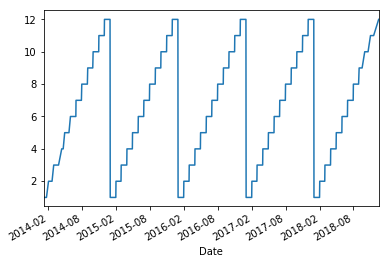

In [47]:
%matplotlib inline
TS['Month'].plot()